# IIT MARDAS
# MACHINE LEARNING PRACTICE PROJECT
## SARTHAK SINGH GAUR
## 21F3001936
### CS2008P

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# DATA LOADING

In [3]:
train= pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
test= pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

# EXPLORATORY DATA ANALYSIS

In [3]:
train.shape

(162758, 5)

In [4]:
train.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [5]:
train.info

<bound method DataFrame.info of                                                   movieid  \
0                                        marvelous_pirate   
1               tony_montana_frodo_baggins_v_rocky_balboa   
2       darth_vader_katniss_everdeen_sorcerer_donnie_d...   
3                                      lara_croft_glimmer   
4       jason_bourne_surreal_the_terminator_indiana_jones   
...                                                   ...   
162753  the_joker_ethereal_captain_jack_sparrow_fantastic   
162754  e.t._hannibal_lecter_vito_corleone_katniss_eve...   
162755                     infinite_enigma_luke_skywalker   
162756                  emerald_oracle_iron_man_wolverine   
162757         james_t._kirk_phenomenal_zephyr_chronicles   

               reviewerName  isFrequentReviewer  \
0            Benjamin Henry               False   
1             Felicia Lopez               False   
2       Mr. Charles Burgess                True   
3              Ryan Barrett    

In [6]:
train.describe

<bound method NDFrame.describe of                                                   movieid  \
0                                        marvelous_pirate   
1               tony_montana_frodo_baggins_v_rocky_balboa   
2       darth_vader_katniss_everdeen_sorcerer_donnie_d...   
3                                      lara_croft_glimmer   
4       jason_bourne_surreal_the_terminator_indiana_jones   
...                                                   ...   
162753  the_joker_ethereal_captain_jack_sparrow_fantastic   
162754  e.t._hannibal_lecter_vito_corleone_katniss_eve...   
162755                     infinite_enigma_luke_skywalker   
162756                  emerald_oracle_iron_man_wolverine   
162757         james_t._kirk_phenomenal_zephyr_chronicles   

               reviewerName  isFrequentReviewer  \
0            Benjamin Henry               False   
1             Felicia Lopez               False   
2       Mr. Charles Burgess                True   
3              Ryan Barrett  

In [7]:
test.shape

(55315, 4)

# DATA PREPROCESSING

In [8]:
from sklearn.preprocessing import LabelEncoder

In [4]:
train.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [5]:
test.isnull().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [6]:
# DROPPING NAs
train = train.dropna(how='any')
test = test.dropna(how='any')

In [7]:
train.isnull().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64

In [13]:
test.isnull().sum()

movieid         0
reviewerName    0
isTopCritic     0
reviewText      0
dtype: int64

In [15]:
# DROPPING EXTRA COLUMNS 
X = train['reviewText']
test = test['reviewText']

In [16]:
# LABEL PREPARATION
y = train['sentiment'].values.reshape(-1,1)
y = y.ravel()

In [17]:
# LABEL ENCODING
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
print("Missing values in X_new:", pd.isnull(X).sum())
print("Missing values in y:", pd.DataFrame(y).isnull().sum())

In [18]:
X

0         Henry Selick’s first movie since 2009’s Corali...
1         With a cast that reads like the Vogue Oscar pa...
2         Creed II does not give us anything but another...
3         I know what you're thinking, but this is no Li...
4         Director Fernando Meirelles tells the story wi...
                                ...                        
162753    A top-notch thriller with genuine surprises an...
162754    Some people find Derek Zoolander funny and lik...
162755    This fun, gentle comedy focuses mainly on them...
162756    The film is rescued by a strong third act, but...
162757            A peerless exercise in stimulus response.
Name: reviewText, Length: 162758, dtype: object

In [19]:
y

array([1, 0, 1, ..., 1, 0, 1])

# FEATURE EXTRACTION AND ENGINEERING

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [81]:
# USING TERM FREQUENCY INVERSE DOCUMENT FREQUENCY VECTORIZER
tfidf = TfidfVectorizer(stop_words='english')
X_final = tfidf.fit_transform(X)
test_final = tfid.transform(test)

In [22]:
X_final

<162758x64912 sparse matrix of type '<class 'numpy.float64'>'
	with 1783211 stored elements in Compressed Sparse Row format>

In [23]:
# SPLITTING TRAINING DATA INTO TRAIN AND TEST
X_train , X_test , y_train , y_test = train_test_split(X_final,y,test_size=0.2, random_state=88)

# MODEL 1 : DUMMY

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

In [25]:
#INSTANTIATING DUMMY CLASSIFIER MODEL
dummy = DummyClassifier (strategy="most_frequent") 

In [26]:
#TRAINING MODEL
dummy.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [27]:
# MODEL EVALUATION
y_pred_dummy = dummy.predict(X_test)
y_pred_dummy

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
# CLASSIFICATION REPORT
class_report_dummy = classification_report(y_test, y_pred_dummy, target_names=['POSITIVE', 'NEGATIVE'])
class_report_dummy

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n    POSITIVE       0.00      0.00      0.00     10808\n    NEGATIVE       0.67      1.00      0.80     21744\n\n    accuracy                           0.67     32552\n   macro avg       0.33      0.50      0.40     32552\nweighted avg       0.45      0.67      0.54     32552\n'

In [29]:
#CONVERTING ENCODED LABELS BACK TO ORIGINAL
# y_pred_dummy = np.where(y_pred_dummy == 1, "POSITIVE", "NEGATIVE")
# y_pred_dummy

In [30]:
# submission_dummy = dummy.predict(test_final)

# MODEL 2 : NAIVE BAYES

In [31]:
# from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc

In [32]:
#INSTANTIATING NAIVE BAYES MODEL FOR HYPERPARAMETER TUNING
# nb = MultinomialNB()

In [33]:
# DEFINING PARAMETERS FOR HYPERTUNING
#  param_knn = {
#     'alpha': [0.1, 0.2, 1,2,10],
#     'fit_prior': [True, False],
#     'class_prior': [None, [0.3, 0.7],[0.4, 0.6]]
# }

In [34]:
# HYPERTUNING USING GRIDSEARCHCV
# gscv_nb = GridSearchCV(estimator=nb, param_grid=param_knn, cv=5, scoring='accuracy',verbose=3,n_jobs=-1)

In [35]:
# gscv_nb.fit(X_train, y_train)

In [36]:
# HYPERTUNED PARAMETERS
# gscv_nb.best_params_

OUTPUT : {'alpha': 0.2, 'class_prior': None, 'fit_prior': True}

In [37]:
# gscv_nb.best_score_

OUTPUT : 0.7551203277009729

In [38]:
#INSTANTIATING NAIVE BAYES MODEL WITH HYPERTUNED PARAMETERS
nb = MultinomialNB(alpha=0.2,class_prior=None,fit_prior=True)

In [39]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [40]:
# MODEL EVALUATION
y_pred_nb = nb.predict(X_test)
y_pred_prob_nb = nb.predict_proba(X_test)[:, 1]

In [41]:
# CLASSIFICATION REPORT
class_report_nb = classification_report(y_test, y_pred_nb, target_names=['POSITIVE', 'NEGATIVE'])
print("Classification Report:")
class_report_nb

Classification Report:


'              precision    recall  f1-score   support\n\n    POSITIVE       0.78      0.44      0.56     10808\n    NEGATIVE       0.77      0.94      0.85     21744\n\n    accuracy                           0.77     32552\n   macro avg       0.77      0.69      0.71     32552\nweighted avg       0.77      0.77      0.75     32552\n'

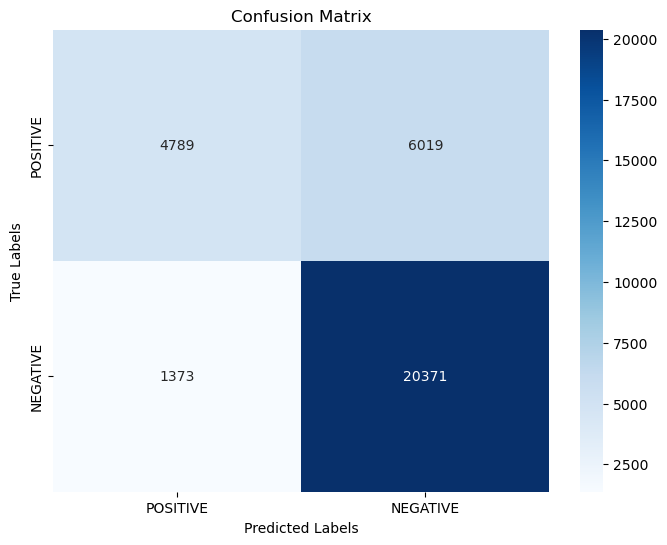

In [42]:
# CONFUSION MATRIX USING HEATMAP
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

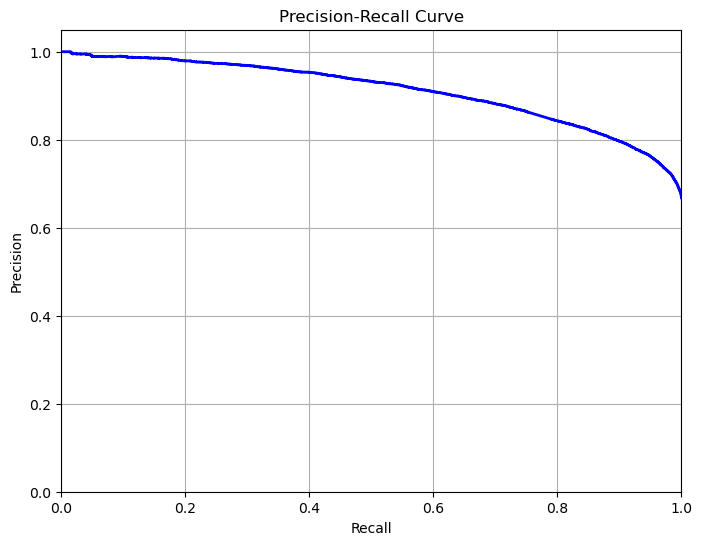

In [43]:
# PRC CURVE
precision_nb, recall_nb, thresholds_prc_nb = precision_recall_curve(y_test, y_pred_prob_nb)
plt.figure(figsize=(8, 6))
plt.plot(recall_nb, precision_nb, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

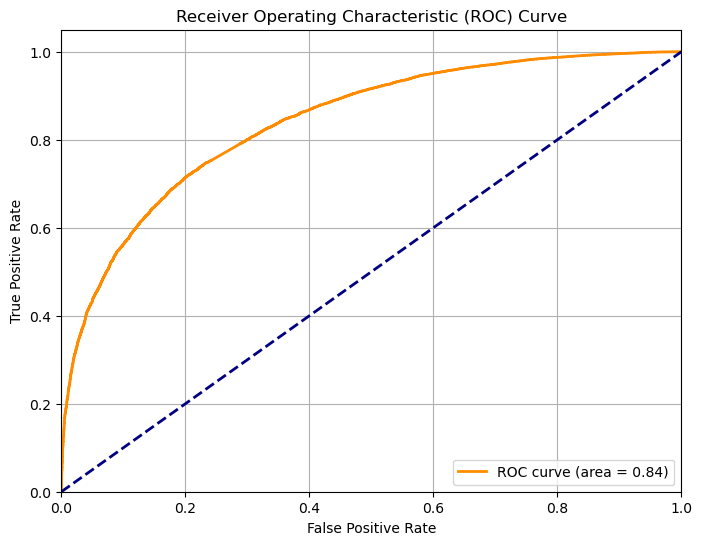

In [44]:
# ROC CURVE
fpr_nb, tpr_nb, thresholds_roc_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

In [45]:
# #CONVERTING ENCODED LABELS BACK TO ORIGINAL
# y_pred_nb = ['POSITIVE' if pred == 1 else 'NEGATIVE' for pred in y_pred_nb]
# y_pred_nb

In [46]:
# submission_nb = nb.predict(test_final)

# MODEL 3 : K-NEAREST NEIGHBOUR

In [47]:
# from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

In [48]:
#INSTANTIATING K-NEAREST NEIGHBOUR MODEL FOR HYPERPARAMETER TUNING
# knn = KNeighborsClassifier()

In [49]:
# DEFINING PARAMETERS FOR HYPERTUNING
# param_knn = {
#     'n_neighbors': [3, 4, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }

In [50]:
# HYPERTUNING USING GRIDSEARCHCV
# gscv_knn = GridSearchCV(knn, param_knn, cv=5,verbose=3,n_jobs=-1)

In [51]:
# gscv_knn.fit(X_train,y_train)

In [52]:
# HYPERTUNED PARAMETERS
# gscv_knn.best_params_

OUTPUT : {'n_neighbors': 4, 'weights': uniform, 'p': 2}

In [53]:
#INSTANTIATING K-NEAREST NEIGHBOUR MODEL WITH HYPERTUNED PARAMETERS
knn = KNeighborsClassifier(n_neighbors=4,weights='uniform',p=2)

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [56]:
# MODEL EVALUATION
y_pred_knn = knn.predict(X_test)
y_pred_knn = knn.predict_proba(X_test)[:, 1]


In [57]:
# CLASSIFICATION REPORT
class_report_knn = classification_report(y_test, y_pred_nb, target_names=['POSITIVE', 'NEGATIVE'])
class_report_knn

'              precision    recall  f1-score   support\n\n    POSITIVE       0.78      0.44      0.56     10808\n    NEGATIVE       0.77      0.94      0.85     21744\n\n    accuracy                           0.77     32552\n   macro avg       0.77      0.69      0.71     32552\nweighted avg       0.77      0.77      0.75     32552\n'

In [59]:
# CONFUSION MATRIX USING HEATMAP
# conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

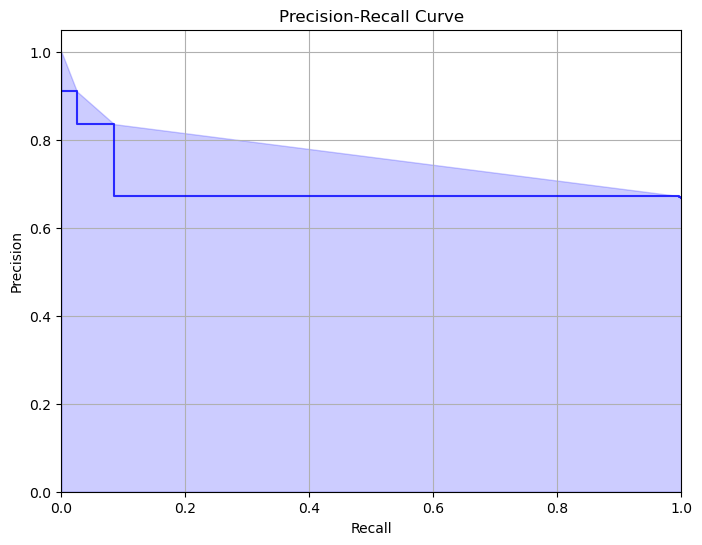

In [60]:
# PRC CURVE
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_pred_knn)
average_precision_knn = average_precision_score(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
plt.step(recall_knn, precision_knn, color='b', alpha=0.8, where='post')
plt.fill_between(recall_knn, precision_knn, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

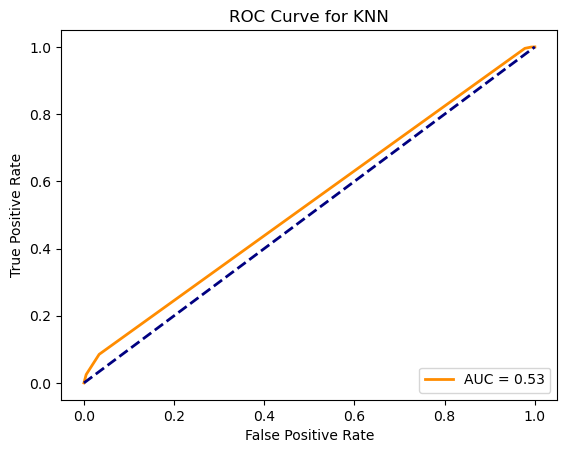

In [62]:
# ROC CURVE
fpr_knn, tpr_knn, thresholds_roc_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#CONVERTING ENCODED LABELS BACK TO ORIGINAL
# y_pred_knn = np.where(y_pred_knn == 1, "POSITIVE", "NEGATIVE")

In [ ]:
# submission_knn = knn.predict(test_final)

# MODEL 4 : LOGISTIC REGRESSION

In [63]:
# from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

In [ ]:
#INSTANTIATING LOGISTIC REGRESSOR MODEL FOR HYPERPARAMETER TUNING
# lr = LogisticRegression()

In [ ]:
# DEFINING PARAMETERS FOR HYPERTUNING
# param_lr = {
#     'C': [0.01, 0.1, 1, 100, 1000], 
#     'penalty': ['l1', 'l2'],         
#     'solver': ['liblinear', 'saga']  
# }

In [ ]:
# HYPERTUNING USING GRIDSEARCHCV
# gscv_lr = GridSearchCV(estimator=lr, param_grid=param_lr, cv=5, scoring='accuracy',verbose=3,n_jobs=-1)

In [ ]:
# gscv_lr.fit(X_train, y_train)

In [ ]:
# HYPERTUNED PARAMETERS
# gscv_lr.best_params_

In [66]:
#INSTANTIATING LOGISTIC REGRESSION MODEL WITH HYPERTUNED PARAMETERS
lr = LogisticRegression(max_iter=1000,C=1.0,penalty='l2',solver='lbfgs')

In [67]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
# MODEL EVALUATION
y_pred_lr = lr.predict(X_test)
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]
y_pred_lr

array([1, 1, 1, ..., 1, 1, 1])

In [69]:
# CLASSIFICATION REPORT
class_report_lr = classification_report(y_test, y_pred_nb, target_names=['POSITIVE', 'NEGATIVE'])
class_report_lr

'              precision    recall  f1-score   support\n\n    POSITIVE       0.78      0.44      0.56     10808\n    NEGATIVE       0.77      0.94      0.85     21744\n\n    accuracy                           0.77     32552\n   macro avg       0.77      0.69      0.71     32552\nweighted avg       0.77      0.77      0.75     32552\n'

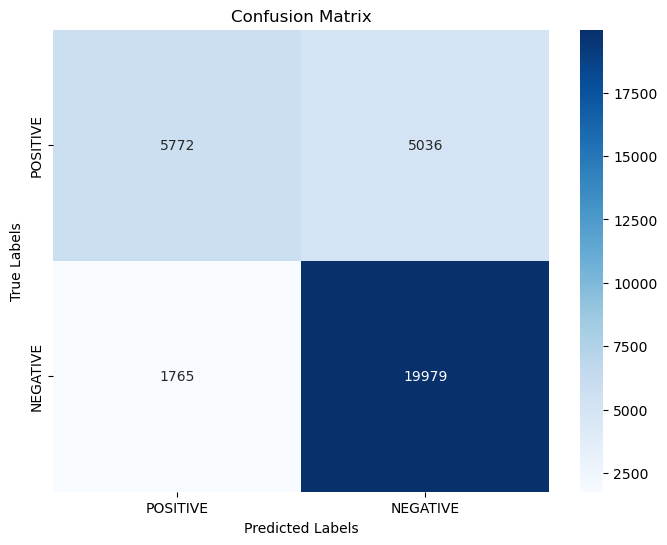

In [70]:
# CONFUSION MATRIX USING HEATMAP
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

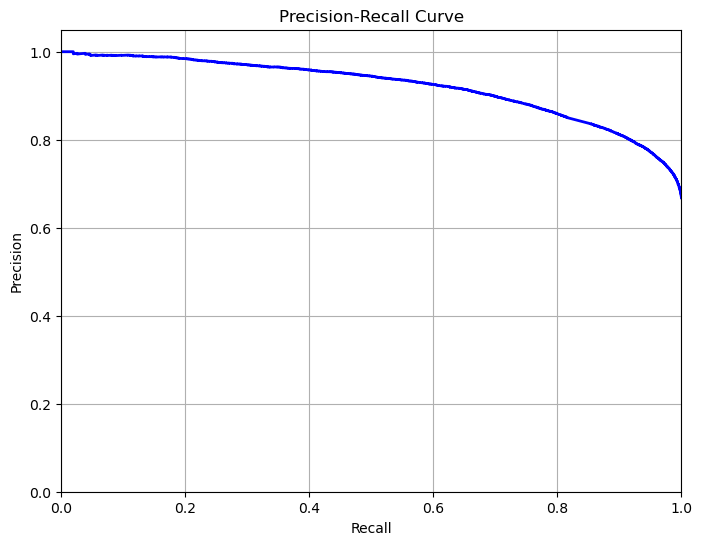

In [71]:
# PRC CURVE
precision_lr, recall_lr, thresholds_prc_lr = precision_recall_curve(y_test, y_pred_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

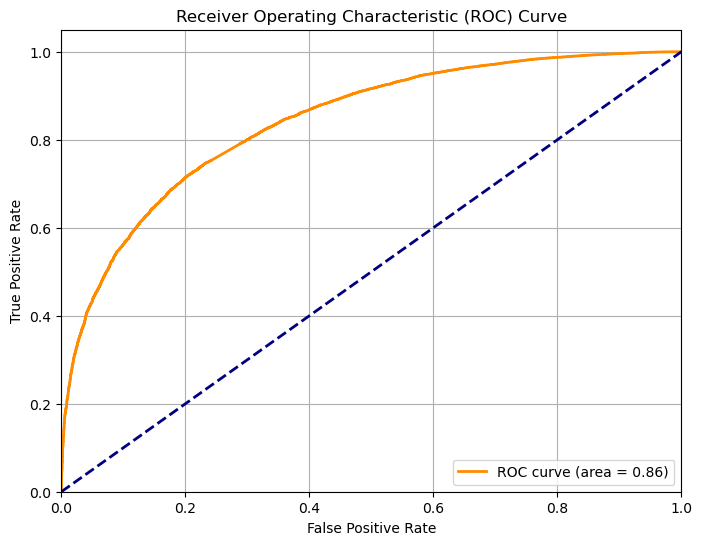

In [72]:
# ROC CURVE
fpr_lr, tpr_lr, thresholds_roc_lr = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

In [ ]:
#CONVERTING ENCODED LABELS BACK TO ORIGINAL
# y_pred_lr = np.where(y_pred_lr == 1, "POSITIVE", "NEGATIVE")

In [ ]:
# submission_lr = lr.predict(test_final)

# MODEL 5 : SUPPORT VECTOR MACHINE

In [73]:
# from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc

In [ ]:
#INSTANTIATING LINEAR SUPPORT VECTOR MACHINE MODEL FOR HYPERPARAMETER TUNING
# svm = LinearSVC()

In [ ]:
# DEFINING PARAMETERS FOR HYPERTUNING
# param_svm = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'max_iter': [100, 500, 1000,5000]
# }

In [ ]:
# HYPERTUNING USING GRIDSEARCHCV
# gscv_svm = GridSearchCV(svm, param_svm, cv=5, scoring='accuracy',verbose=3, n_jobs=-1)

In [ ]:
# gscv_svm.fit(X_train, y_train)

In [ ]:
# HYPERTUNED PARAMETERS
# gscv_svm.best_params_

OUTPUT : {'C': 0.1, 'max_iter': 100}

In [ ]:
# gscv_svm.best_score_

OUTPUT : 0.7884583048121516


In [74]:
# INSTANTIATING LINEAR SUPPORT VECTOR MACHINE MODEL WITH HYPERTUNED PARAMETERS
svm = LinearSVC(C=0.1,max_iter=100)

In [75]:
svm.fit(X_train,y_train)

LinearSVC(C=0.1, max_iter=100)

In [76]:
# MODEL EVALUATION
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = lr.predict_proba(X_test)[:, 1]
y_pred_svm

array([1, 1, 1, ..., 1, 1, 1])

In [77]:
# CLASSIFICATION REPORT
class_report_svm = classification_report(y_test, y_pred_nb, target_names=['POSITIVE', 'NEGATIVE'])
class_report_svm

'              precision    recall  f1-score   support\n\n    POSITIVE       0.78      0.44      0.56     10808\n    NEGATIVE       0.77      0.94      0.85     21744\n\n    accuracy                           0.77     32552\n   macro avg       0.77      0.69      0.71     32552\nweighted avg       0.77      0.77      0.75     32552\n'

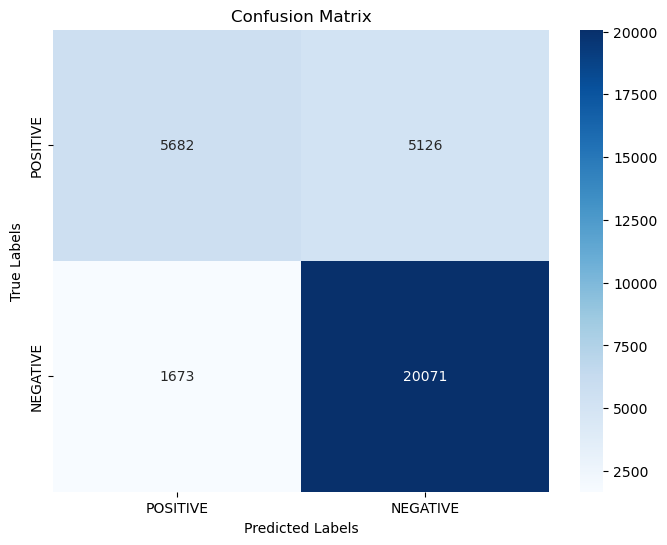

In [78]:
# CONFUSION MATRIX USING HEATMAP
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['POSITIVE', 'NEGATIVE'], yticklabels=['POSITIVE', 'NEGATIVE'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

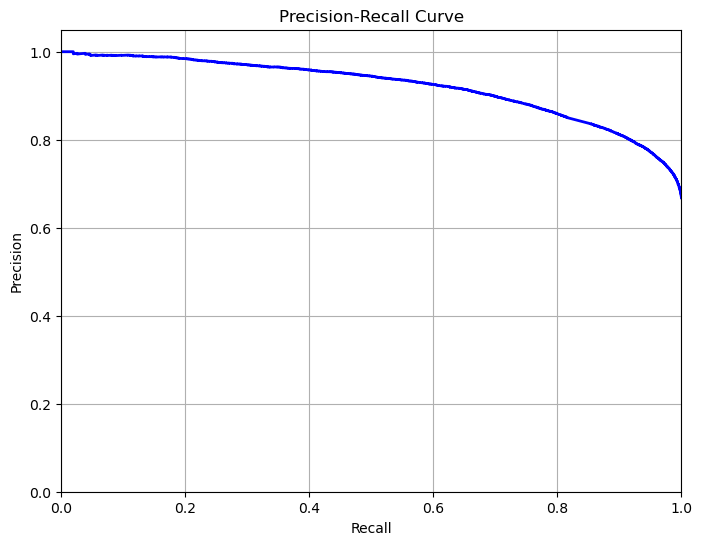

In [79]:
# PRC CURVE
precision_svm, recall_svm, thresholds_prc_svm = precision_recall_curve(y_test, y_pred_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

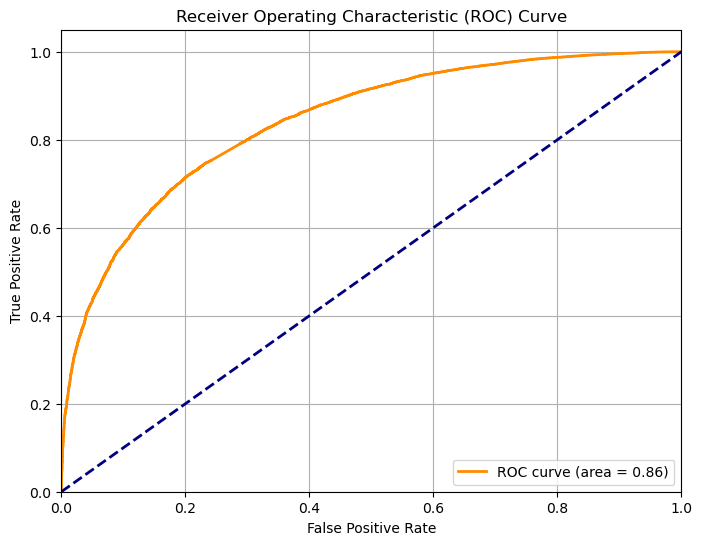

In [80]:
# ROC CURVE
fpr_svm, tpr_svm, thresholds_roc_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid()
plt.show()

In [ ]:
#CONVERTING ENCODED LABELS BACK TO ORIGINAL
# y_pred_svm = np.where(y_pred_svm == 1, "POSITIVE", "NEGATIVE")

In [ ]:
# submission_svm = svm.predict(test_final)

# SUBMISSION

In [ ]:
# SELECTING THE MODEL WE ARE SUBMITTING

# final_submission = submission_dummy
# final_submission = submission_nb
# final_submission = submission_knn
# final_submission = submission_lr
# final_submission = submission_svm

In [ ]:
# CREATING OUTPUT FILE
# sub = pd.DataFrame(submission, columns=['sentiment'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')

# result = pd.read_csv("submission.csv")

In [ ]:
#FINAL RESULT
# result